# Intro

In [1]:
#Read in libraries
import pandas as pd
import swifter

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [2]:
#Set style for matplotlib
plt.style.use('ggplot')

In [3]:
#Set options for pandas
pd.options.display.max_columns =500

pd.set_option('display.max_rows', 120)


In [4]:
#Set path to listings data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\02_Intermediate'

#Set list of date columns to parse
dates = ['calendar_last_scraped', 'first_review', 'host_since', 'last_review']

#Read in file
listings = pd.read_csv(path + '/01_04_2020_Listings_Cleaned.csv',index_col=0, parse_dates=dates)

#Ordinal variables to convert to category
ordinals = ['review_scores_accuracy', 'review_scores_checkin','review_scores_cleanliness', 'review_scores_communication',
            'review_scores_location','review_scores_rating','review_scores_value','room_type','zipcode',
            'property_type']

#Convert 
listings[ordinals] = listings[ordinals].astype('category')

C:\Users\kishe\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (22,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#Print original listings shape
print("Original listings shape: ", listings.shape)
#Preview listings data
listings.head().T

Original listings shape:  (88771, 69)


,0,1,2,3,5
accommodates,3,5,2,2,6
amenities,TV Cable TV Internet Wifi Kitchen Pets liv...,Internet Wifi Kitchen Heating Family/kid fri...,TV Internet Wifi Kitchen Free street parking...,TV Internet Wifi Kitchen Free street parking...,TV Cable TV Internet Wifi Kitchen Free par...
availability_30,0,0,30,30,0
availability_365,77,0,365,365,20
bathrooms,1,1,4,4,1
bed_type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
bedrooms,1,2,1,1,2
beds,2,3,1,1,3
calculated_host_listings_count,1,1,9,9,1
calculated_host_listings_count_private_rooms,0,0,9,9,0


In [7]:
listings.dtypes

accommodates                                             int64
amenities                                               object
availability_30                                          int64
availability_365                                         int64
bathrooms                                              float64
bed_type                                                object
bedrooms                                               float64
beds                                                   float64
calculated_host_listings_count                           int64
calculated_host_listings_count_private_rooms           float64
calculated_host_listings_count_shared_rooms            float64
cancellation_policy                                     object
city                                                    object
cleaning_fee                                           float64
extra_people                                           float64
guests_included                                        

# Removing irrelevant features

In [6]:
#Removing columns that do not influence price

to_drop = ['calendar_last_scraped','calendar_updated', 'description','first_review','host_id',
          'host_listings_count','host_location','host_name', 'host_neighbourhood','house_rules','name',
          'neighborhood_overview']

listings.drop(columns=to_drop, inplace = True)
print('Current shape of listings: ', listings.shape)

Current shape of listings:  (88771, 57)


# Feature Engineering

## Transform numeric columns

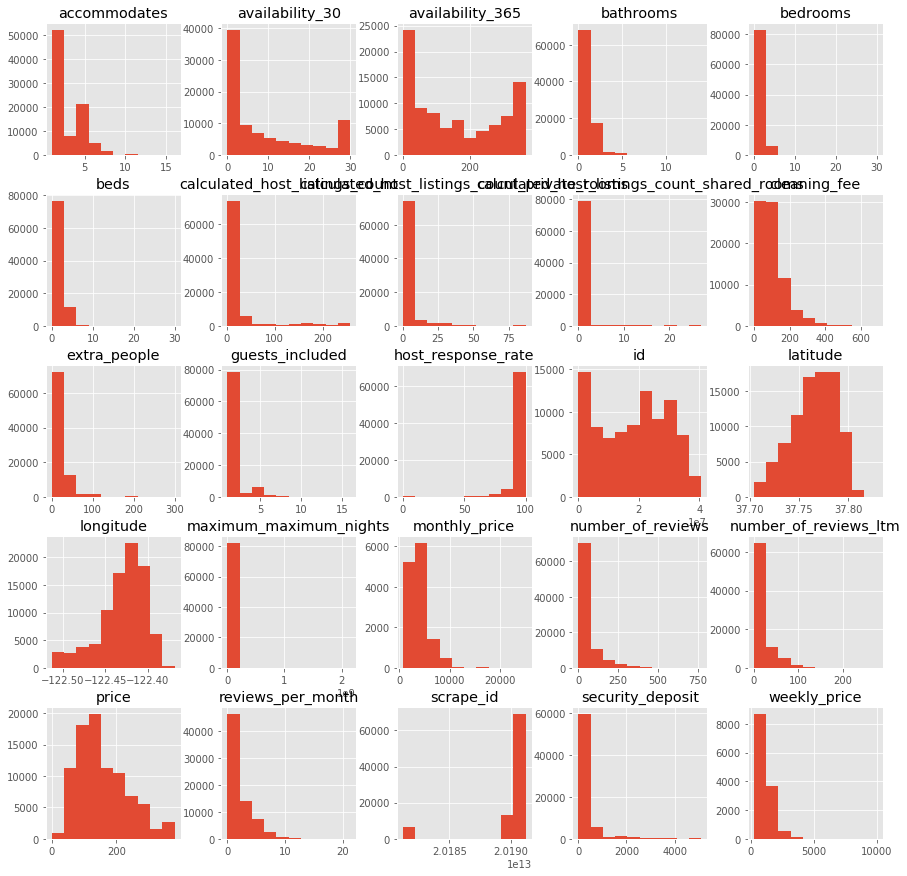

In [12]:
numerics = listings.select_dtypes(exclude=['category','bool','object','datetime64'])

numerics.hist(figsize = (15,15));

## Adding new features

In [22]:
#Convert amenities into a count of amenities offered by airbnb
listings['total_amenities']= listings['amenities'].str.count(' ') + 1

#Check
listings[['total_amenities', 'amenities']].head(5)

,total_amenities,amenities
0,75,TV Cable TV Internet Wifi Kitchen Pets liv...
1,42,Internet Wifi Kitchen Heating Family/kid fri...
2,57,TV Internet Wifi Kitchen Free street parking...
3,50,TV Internet Wifi Kitchen Free street parking...
5,99,TV Cable TV Internet Wifi Kitchen Free par...


Split amenities and turn into catagorical variables

In [23]:
#Split amenities and encode as dummy variables
temp = listings['amenities'].str.get_dummies(sep=' ')

#Remove column headers shorter than 3 characters in length
for col in temp.columns: 
    if len(col) < 3:
        temp.drop(columns= col, inplace=True)

#Combine listings and temp
listings = pd.concat([listings, temp], axis=1)

#Drop amenities column
listings.drop(columns = ['amenities'], inplace = True)

In [24]:
#check
print('Current shape of listings: ', listings.shape)
listings.head(3)

Current shape of listings:  (88771, 361)


,accommodates,availability_30,availability_365,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,house_rules,id,instant_bookable,is_location_exact,last_review,latitude,longitude,market,maximum_maximum_nights,name,neighborhood_overview,neighbourhood_cleansed,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,space,summary,transit,zipcode,weekly_price,monthly_price,total_amenities,24-hour,Accessible-height,Air,Amazon,BBQ,Baby,Babysitter,Balcony,Bath,Bathroom,Bathtub,Beach,Beachfront,Bed,Bedroom,Bidet,Body,Breakfast,Building,Buzzer/wireless,Cable,Carbon,Cat(s),Ceiling,Central,Changing,Children’s,Cleaning,Coffee,Convection,Cooking,Crib,DVD,Day,Disabled,Dishes,Dishwasher,Dog(s),Doorman,Double,Dryer,Echo,Electric,Elevator,Espresso,Essentials,Ethernet,Exercise,Extra,Family/kid,Fax,Fire,Fireplace,Firm,First,Fixed,Flat,Formal,Free,Full,Game,Garden,Gas,Ground,Gym,HBO,Hair,Hammock,Handheld,Hangers,Heat,Heated,Heating,High,High-resolution,Host,Hot,Indoor,Internet,Iron,Jetted,Keypad,Kitchen,Kitchenette,Lake,Laptop,Lock,Lockbox,Long,Luggage,Memory,Microwave,Mini,Mobile,Mountain,Mudroom,Murphy,Netflix,Other,Outdoor,Outlet,Oven,Pack,Paid,Patio,Pets,Pillow-top,Play/travel,Pocket,Pool,Printer,Private,Projector,Rain,Refrigerator,Roll-in,Room-darkening,Safety,Self,Shampoo,Shared,Shower,Single,Ski-in/Ski-out,Smart,Smoke,Smoking,Soaking,Sound,Stair,Stand,Standing,Steam,Step-free,Stove,Suitable,Sun,Table,Tennis,Terrace,Toilet,Walk-in,Warming,Washer,Waterfront,Well-lit,Wheelchair,Wide,Wifi,Window,Wine,access,accessible,aid,air,allowed,alone,and,area,around,backyard,balcony,bars,basics,bath,bathroom,bed,bedroom,before,blankets,books,card,chair,charger,check-in,checkout,clearance,comforts,computer,conditioning,connection,console,cooler,corner,court,covers,crib,detector,dining,dinnerware,door,doorway,drawer,dropoff,dryer,en.hosting_amenity_49,en.hosting_amenity_50,enter,entrance,entryway,equipment,essentials,events,extinguisher,fan,fireplace,floor,floors,foam,for,fridge,friendly,front,gates,grab,greets,grill,guards,guest,guests,gym,hallway,hallways,head,hoist,home,hot,intercom,kettle,kit,kitchen,lamps,level,linens,live,living,lock,loungers,machine,maker,mattress,missing:,monitor,monoxide,off,oven,paper,parking,path,pet(s),pillows,pit,player,pool,premises,profiling,property,purifier,rack,recommendations,room,screen,seating,shades,shower,silverware,soap,space,spot,staff,stairs,stays,steam,steps,street,suite,system,table,term,this,toilet,towel,toys,translation,tub,valet,view,water,wifi,with,workspace,you
0,3,0,77,1.0,Real Bed,1.0,2.0,1,0.0,0.0,2019-04-03,1 week ago,moderate,San Francisco,100.0,New update: the house next door is under const...,25.0,2009-07-23,2,We are a family with 2 boys born in 2009 and 2...,True,1169,True,True,1.0,"San Francisco, California, United States",Holly,Duboce Triangle,100.0,within an hour,2008-07-31,email phone facebook reviews kba,* No Pets - even visiting guests for a short t...,958,True,True,2019-03-16,37.76931,-122.43386,San Francisco,30.0,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Western Addition,183,51.0,170.0,Apartment,False,False,True,10.0,10.0,10.0,10.0,10.0,97.0,10.0,1.55,Entire home/apt,2.019040e+13,100.0,"Newly remodeled, modern, an

# Encode Dummy Variables

In [25]:
#encode nominal variables
nominals = ['room_type','zipcode','property_type']

#Create dummy variables and concat with listings
listings = pd.concat([listings, pd.get_dummies(listings[nominals])], axis = 1)

#Drop original features
listings.drop(columns = nominals, inplace = True)

In [26]:
print('Current shape of listings: ', listings.shape)

Current shape of listings:  (88771, 425)


In [55]:
listings = pd.get_dummies(listings)

In [28]:
#Rename 


# Feature Selection

In [30]:
#scale data